## **Akila Bamunusingha Arachchi
Reg No: 250**





# Capstone Project

#### If any user wants to buy a computer, this application may compatible to provide a tentative price of computer according to the user configurations. 

####  

In [80]:
#Import required libraries 
import numpy as np
import pandas as pd

In [81]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [82]:
#import data set using pandas

data = pd.read_csv('/content/gdrive/My Drive/Data/computer_price.csv', encoding='latin-1')

## Analyse the data

In [83]:
#check 1st 5 data samples 
data.head(5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [84]:
#check availble number of rows and columns
data.shape

(1303, 12)

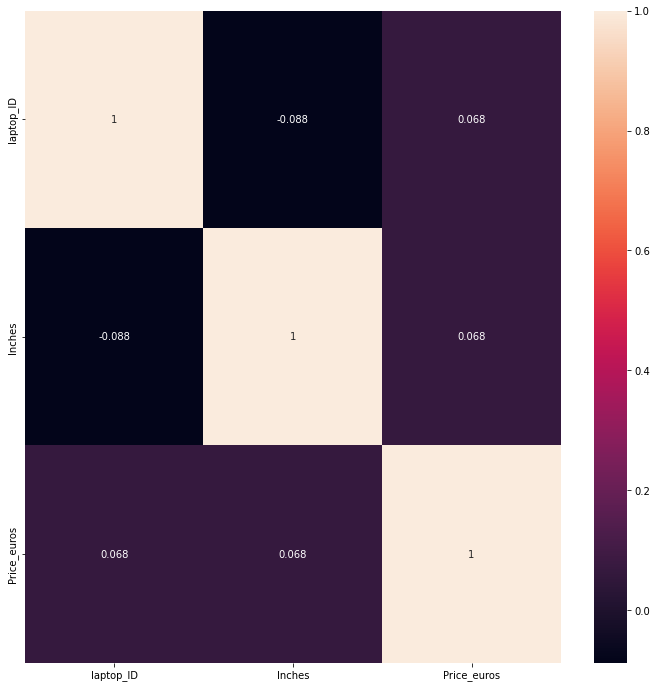

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix=data.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [86]:
#check the count of null values available in the data set
data.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [87]:
#check informations of data set (non-null value count, data type, No of data types, memory usage)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


## Data Preprocessing

In [88]:
#convert object data type vales in to ML understandable data types (ex; int, float)
data['Ram'] = data['Ram'].astype(str).str.replace('GB','').astype('int')
data['Weight'] = data['Weight'].astype(str).str.replace('kg','').astype('float')

In [89]:
#check 1st 5 data samples 
data.head(5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [90]:
#check the most correlated features with price of a laptop
data.corr()['Price_euros']

laptop_ID      0.067830
Inches         0.068197
Ram            0.743007
Weight         0.210370
Price_euros    1.000000
Name: Price_euros, dtype: float64

#### "Company" Column data handling

In [91]:
#check no of categoies available in company column
data['Company'].value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

In [92]:
#check length of categoies available in company column
len(data['Company'].value_counts())

19

In [93]:
#put less no (count of less than 10) categories into "other" category  
def add_company(inpt):
    if inpt == 'Samsung' or inpt == 'Razer' or inpt == 'Mediacom' or inpt == 'Microsoft'or inpt == 'Xiaomi'or inpt == 'Vero'or inpt == 'Chuwi'or inpt == 'Google'or inpt == 'Fujitsu'or inpt == 'LG'or inpt == 'Huawei':
        return 'Other'
    else:
        return inpt

In [94]:
# apply data into "other" category and reprocess the company column
data['Company'] = data['Company'].apply(add_company)

In [95]:
#check no of categoies available in company column
data['Company'].value_counts()

Dell       297
Lenovo     297
HP         274
Asus       158
Acer       103
MSI         54
Other       51
Toshiba     48
Apple       21
Name: Company, dtype: int64

#### "Product" Column data handling

In [96]:
#check no of categoies available in product column
len(data['Product'].value_counts())

618

#### "TypeName" Column data handling

In [97]:
#check no of categoies available in TypeName column
data['TypeName'].value_counts()

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64

#### "ScreenResolution" Column data handling

In [98]:
#check no of categoies available in ScreenResolution column
data['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [99]:
#make separeate column of "Touchscreen" and  if "Touchscreen" available in "ScreenResolution" then put it into "1", else "0"
data['Touchscreen'] = data['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

#make separeate column of "IPS" and if "IPS" available in "ScreenResolution" then put it into "1", else "0"
data['IPS'] = data['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [100]:
#check 1st 5 data samples 
data.head(5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1


#### "Cpu" Column data handling

In [101]:
#check no of categoies available in Cpu column
data['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [102]:
#make separate column of 'cpu_name' and add first 3 strings into it without having speed of the CPU
data['cpu_name'] = data['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [103]:
#recheck no of categoies available in Cpu_name column
data['cpu_name'].value_counts()

Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
Intel Pentium Dual            3
AMD A9-Series 9410            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD A10-Series 9620P          2
Intel Atom X5-Z8350           2
AMD E-Series E2-9000e         2
Intel Xeon E3-1535M           2
Intel Xeon E3-1505M           2
AMD E-Series 7110             2
AMD A10-Series 9600P          2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
AMD Ryzen 1600                1
Intel Atom x5-Z8300           1
AMD E-Series E2-6110          1
AMD FX 9830P                  1
AMD E-Series E2-9000          1
AMD A6-S

In [104]:
# if the cpu names are "Intel Core i7","Intel Core i5","Intel Core i3" then return the same name or 
# if name start with "AMD", then return as it is
# else return other names as "Other"
def set_processor(name):
    if name == 'Intel Core i7' or name == 'Intel Core i5' or name == 'Intel Core i3':
        return name
    else:
        if name.split()[0] == 'AMD':
            return 'AMD'
        else:
            return 'Other'

In [105]:
#  reprocess the "cpu_name" column as per above cell
data['cpu_name'] = data['cpu_name'].apply(set_processor)

In [106]:
#recheck no of categoies available in Cpu_name column
data['cpu_name'].value_counts()

Intel Core i7    527
Intel Core i5    423
Other            155
Intel Core i3    136
AMD               62
Name: cpu_name, dtype: int64

In [107]:
#check 1st 20 data samples 
data.head(20)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,cpu_name
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,Intel Core i5
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,Intel Core i5
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,Intel Core i5
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,Intel Core i7
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,Intel Core i5
5,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,AMD Radeon R5,Windows 10,2.10,400.00,0,0,AMD
6,7,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16,Intel Iris Pro Graphics,Mac OS X,2.04,2139.97,0,1,Intel Core i7
7,8,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,1158.70,0,0,Intel Core i5
8,9,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,Nvidia GeForce MX150,Windows 10,1.30,1495.00,0,0,Intel Core i7
9,10,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,Intel UHD Graphics 620,Windows 10,1.60,770.00,0,1,Intel Core i5


#### "Ram" Column data handling

In [108]:
#check no of categoies available in Ram column
data['Ram'].value_counts()

8     619
4     375
16    200
6      41
12     25
2      22
32     17
24      3
64      1
Name: Ram, dtype: int64

#### "Gpu" Column data handling

In [109]:
#check no of categoies available in Gpu column
data['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [110]:
# make separate column of 'gpu_name' and add only first string into it without having other details of GPU
data['gpu_name'] = data['Gpu'].apply(lambda x:" ".join(x.split()[0:1]))

In [111]:
# recheck no of categoies available in Gpu column
data['gpu_name'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: gpu_name, dtype: int64

In [112]:
# check availble number of rows and columns
data.shape

(1303, 16)

In [113]:
#remove "ARM" from "gpu_name" column; because only 1 available as per above category list
data = data[data['gpu_name'] != 'ARM']

In [114]:
# recheck availble number of rows and columns
data.shape

(1302, 16)

In [115]:
#check 1st 5 data samples 
data.head(5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,cpu_name,gpu_name
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,Intel Core i5,Intel
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,Intel Core i5,Intel
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,Intel Core i5,Intel
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,Intel Core i7,AMD
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,Intel Core i5,Intel


#### "OpSys" Column data handling

In [116]:
#check no of categoies available in operating system column

data['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [117]:
def set_os(inpt1):
    if inpt1 == 'Windows 10' or inpt1 == 'Windows 7' or inpt1 == 'Windows 10 S':
        return 'Windows'
    elif inpt1 == 'macOS' or inpt1 == 'Mac OS X':
        return 'Mac'
    elif inpt1 == 'Linux':
        return 'Linux'
    else:
        return 'Other'

In [118]:
#  reprocess the "OpSys" column as per above cell
data['OpSys'] = data['OpSys'].apply(set_os)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [119]:
# recheck no of categoies available in operating system column
data['OpSys'].value_counts()

Windows    1125
Other        94
Linux        62
Mac          21
Name: OpSys, dtype: int64

In [120]:
#check 1st 5 data samples 
data.head(5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,cpu_name,gpu_name
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,Mac,1.37,1339.69,0,1,Intel Core i5,Intel
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,Mac,1.34,898.94,0,0,Intel Core i5,Intel
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,Other,1.86,575.00,0,0,Intel Core i5,Intel
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,Mac,1.83,2537.45,0,1,Intel Core i7,AMD
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,Mac,1.37,1803.60,0,1,Intel Core i5,Intel


#### Drop unnecessary columns 

In [121]:
# remove all the unnecessary data column from the data set after preprocessing is done
data = data.drop(columns=['laptop_ID', 'Inches', 'Product', 'ScreenResolution', 'Cpu', 'Gpu'])

In [122]:
#check the processed data sample again
data.head()

,Company,TypeName,Ram,OpSys,Weight,Price_euros,Touchscreen,IPS,cpu_name,gpu_name
0,Apple,Ultrabook,8,Mac,1.37,1339.69,0,1,Intel Core i5,Intel
1,Apple,Ultrabook,8,Mac,1.34,898.94,0,0,Intel Core i5,Intel
2,HP,Notebook,8,Other,1.86,575.00,0,0,Intel Core i5,Intel
3,Apple,Ultrabook,16,Mac,1.83,2537.45,0,1,Intel Core i7,AMD
4,Apple,Ultrabook,8,Mac,1.37,1803.60,0,1,Intel Core i5,Intel


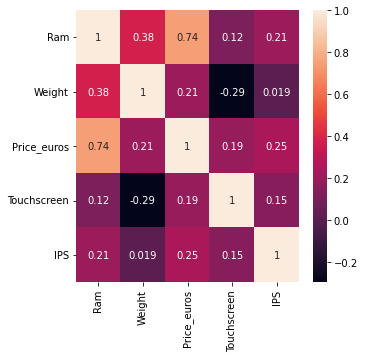

In [123]:
corr_matrix=data.corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr_matrix, annot=True)
plt.show()

#### One-Hot Encoding 

In [124]:
# Convert categorical variable into dummy/indicator variables(quantify categorical data)
data = pd.get_dummies(data)

In [125]:
#check the quantified data sample 
data.head(5)

,Ram,Weight,Price_euros,Touchscreen,IPS,Company_Acer,Company_Apple,Company_Asus,Company_Dell,Company_HP,...,OpSys_Other,OpSys_Windows,cpu_name_AMD,cpu_name_Intel Core i3,cpu_name_Intel Core i5,cpu_name_Intel Core i7,cpu_name_Other,gpu_name_AMD,gpu_name_Intel,gpu_name_Nvidia
0,8,1.37,1339.69,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,8,1.34,898.94,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,8,1.86,575.00,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
3,16,1.83,2537.45,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,8,1.37,1803.60,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [126]:
# check the shape of the data rows and columns
data.shape

(1302, 32)

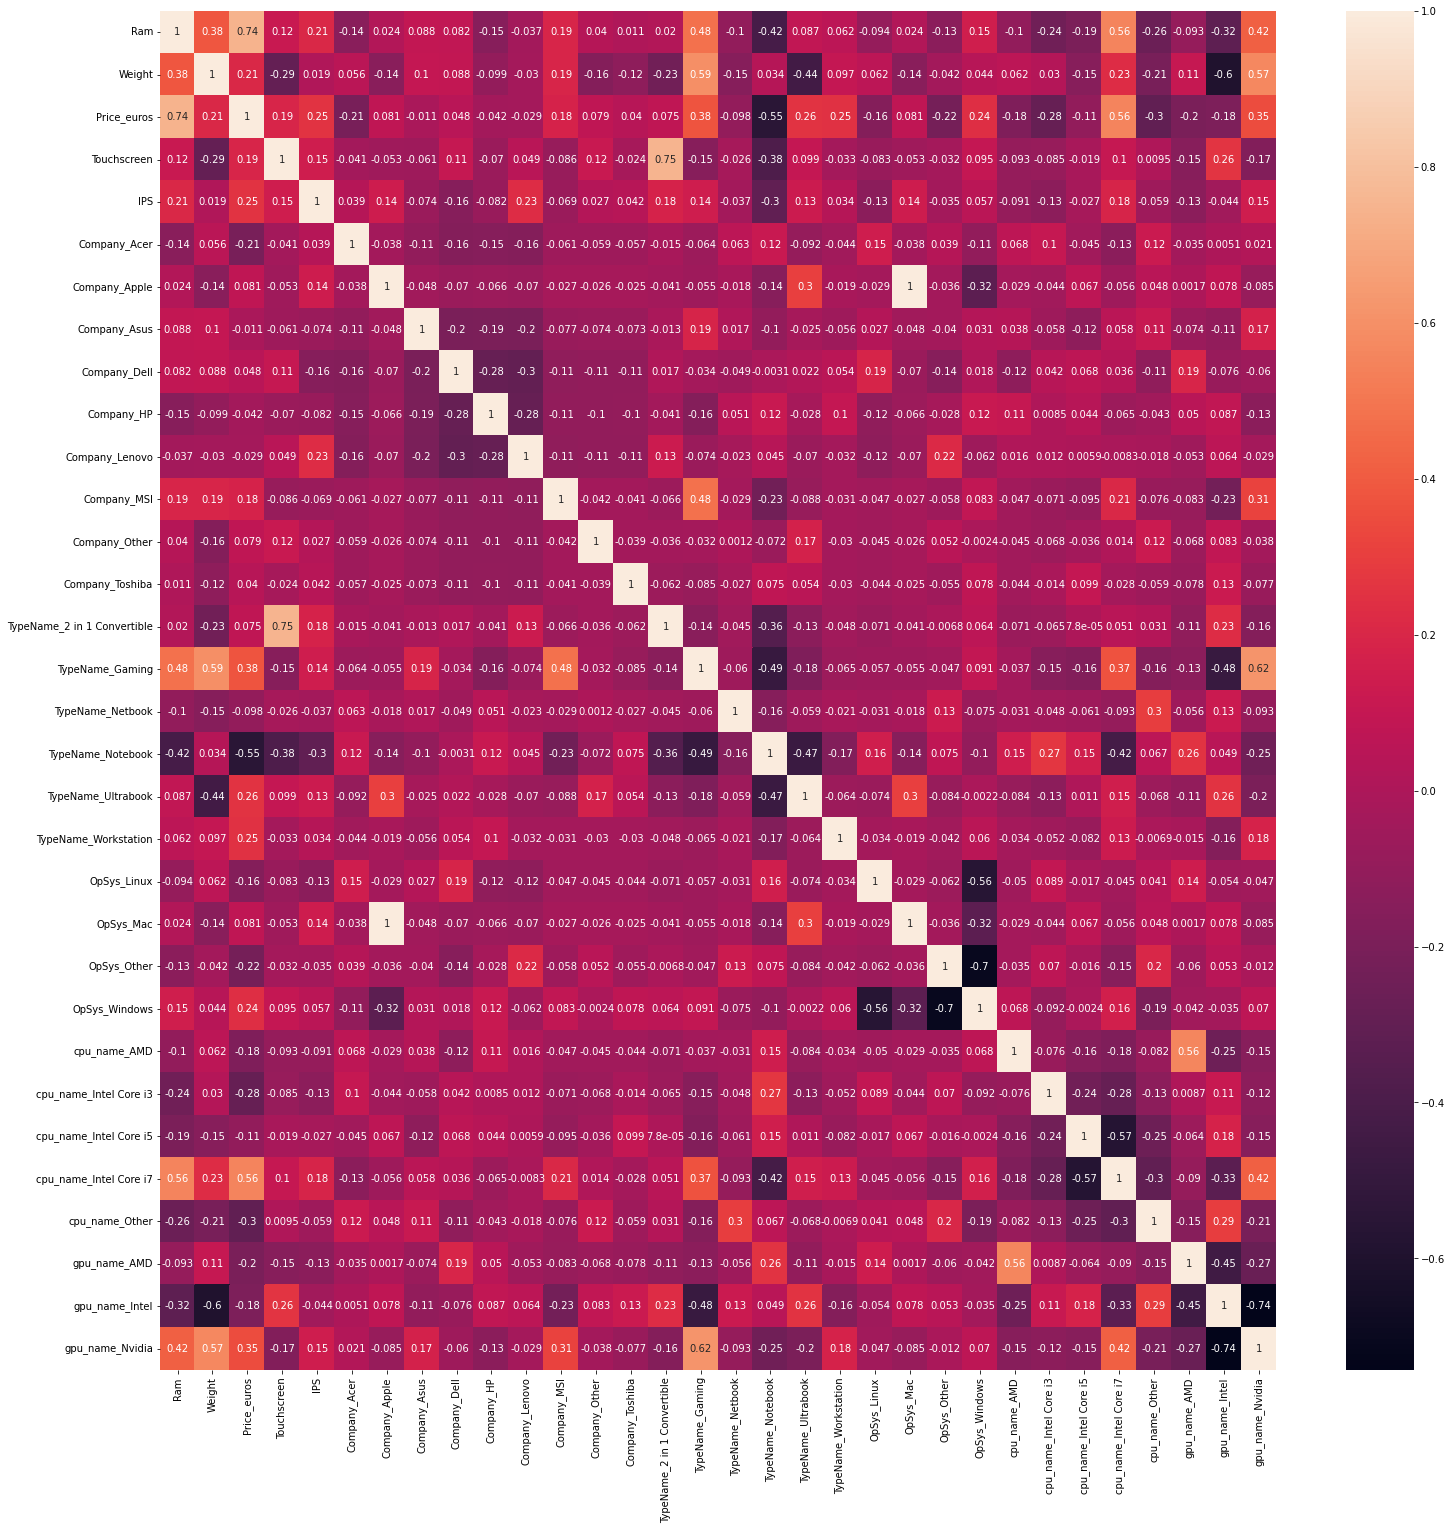

In [127]:
corr_matrix=data.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr_matrix, annot=True)
plt.show()

# ML Model Building & Testing 

In [128]:
# consider the "X" is as features and "Y" is as lables
X = data.drop('Price_euros', axis=1)    # drop label 'Price_euros' from features data set 
Y = data['Price_euros'] 

#### Divide data into training and testing data 

In [129]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3) # Train data = 70% ; Test data = 30%

In [130]:
#check shape of the train and test data sets
X_train.shape, X_test.shape

((911, 31), (391, 31))

In [131]:
Y_train.shape, Y_test.shape

((911,), (391,))

#### Train the model 

In [132]:
# create the model accuracy function
def model_accuracy(model):
    model.fit(X_train, Y_train) # train the model
    accuracy = model.score(X_test, Y_test) # find the accuracy using test data set
    print(str(model)+ '--->>>' +str(accuracy)) # Print accuracy of the model

#### Check model accuracies

In [133]:
# create linear regression model
from sklearn.linear_model import LinearRegression
LR = LinearRegression() # call the constructor of the class
model_accuracy(LR) # check model accuracy


LinearRegression()--->>>0.7146580345246928


In [134]:

Y_pred0=LR.predict(X_train)
Y_pred0.shape, Y_train.shape


((911,), (911,))

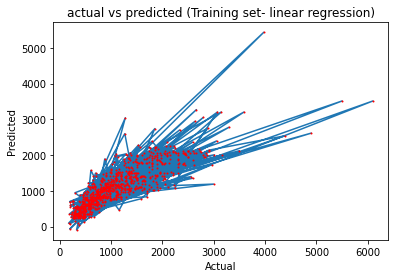

In [135]:
#plt.scatter(Y_train, Y_pred0, color = 'red')
#plt.plot(Y_train, Y_pred0, color = 'blue')
plt.plot(Y_train,Y_pred0, marker="o", markersize=1, markeredgecolor="red", markerfacecolor="green")
plt.title('actual vs predicted (Training set- linear regression)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


In [136]:
# create lasso regression model
from sklearn.linear_model import Lasso
lasso = Lasso() # call the constructor of the class
model_accuracy(lasso) # check model accuracy


Lasso()--->>>0.7163557190663887


In [137]:
Y_pred1=lasso.predict(X_train)

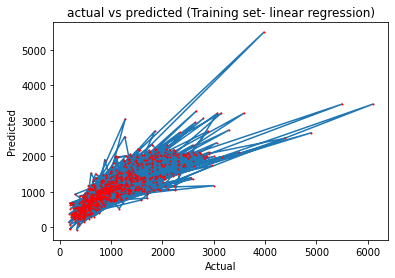

In [138]:
#plt.scatter(Y_train, Y_pred1, color = 'red')
#plt.plot(Y_train, Y_pred1, color = 'blue')
plt.plot(Y_train,Y_pred1, marker="o", markersize=1, markeredgecolor="red", markerfacecolor="green")
plt.title('actual vs predicted (Training set- linear regression)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [139]:
# create decision tree regression model
from sklearn.tree import DecisionTreeRegressor 
DT = DecisionTreeRegressor() # call the constructor of the class
model_accuracy(DT) # check model accuracy


DecisionTreeRegressor()--->>>0.6961054773901181


In [140]:
Y_pred2=DT.predict(X_train)

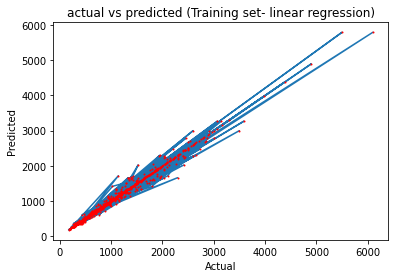

In [141]:
#plt.scatter(Y_train, Y_pred2, color = 'red')
#plt.plot(Y_train, Y_pred2, color = 'blue')
plt.plot(Y_train,Y_pred2, marker="o", markersize=1, markeredgecolor="red", markerfacecolor="green")
plt.title('actual vs predicted (Training set- linear regression)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [142]:
# create random forest regression model
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor() # call the constructor of the class
model_accuracy(RF) # check model accuracy

RandomForestRegressor()--->>>0.787953467152373


In [143]:
Y_pred3=RF.predict(X_train)

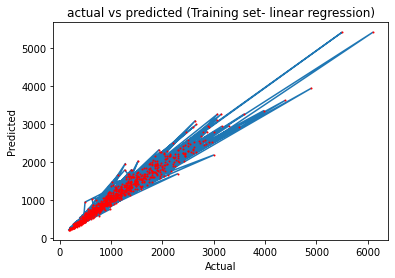

In [144]:
#plt.scatter(Y_train, Y_pred3, color = 'red')
#plt.plot(Y_train, Y_pred3, color = 'blue')
plt.plot(Y_train,Y_pred3, marker="o", markersize=1, markeredgecolor="red", markerfacecolor="green")
plt.title('actual vs predicted (Training set- linear regression)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

#### Hyperparameter tunning  (Optimization)

In [145]:
#choosing a set of optimal hyperparameters for a learning algorithm
from sklearn.model_selection import GridSearchCV

# 'n_estimators (The number of trees in the forest) and 'criterion' is used as parameters in sklern library
# criterion : mean squared error and mean absolute error
parameters = {'n_estimators':[10, 50, 100],'criterion':['squared_error','absolute_error','poisson']} 

grid_obj = GridSearchCV(estimator=RF, param_grid=parameters) #only RF (random forest) is given as estimator

grid_fit = grid_obj.fit(X_train, Y_train) # fit the model using train data set

#check best criterion
best_model = grid_fit.best_estimator_
print(best_model)

RandomForestRegressor()


In [146]:
# best model accuracy
best_model.score(X_test,Y_test)

0.7893155062804624

In [147]:
Y_pred4=best_model.predict(X_train)

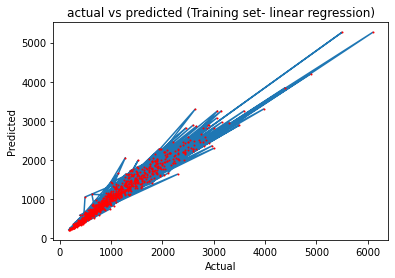

In [148]:
#plt.scatter(Y_train, Y_pred4, color = 'red')
#plt.plot(Y_train, Y_pred4, color = 'blue')
plt.plot(Y_train,Y_pred4, marker="o", markersize=1, markeredgecolor="red", markerfacecolor="green")
plt.title('actual vs predicted (Training set- linear regression)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# Saving the Model 

In [149]:
# saving the best model using pickle library
import pickle
with open('predicted.pickle', 'wb') as file: #wb--->> write binary
    pickle.dump(best_model, file) #best model to dump into the file


In [152]:
# exmple prediction
pred_value = best_model.predict([[8, 1.3, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0]])
# 1 EUR = LKR 319
print("Computer Price (LKR) =",round(*pred_value*320, 2))

Computer Price (LKR) = 761416.96


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
